##### 题目一：采用 scikit-learn 中的 LogisticRegression 逻辑回归模型对 iris 数据集进行二分类

In [1]:
# 数据集与使用库的导入
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
import numpy as np
import sklearn

plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示


1. 特征可视化：任选两个特征和两种类别进行散点图可视化，观察是否线性可分

数据集描述：
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 class

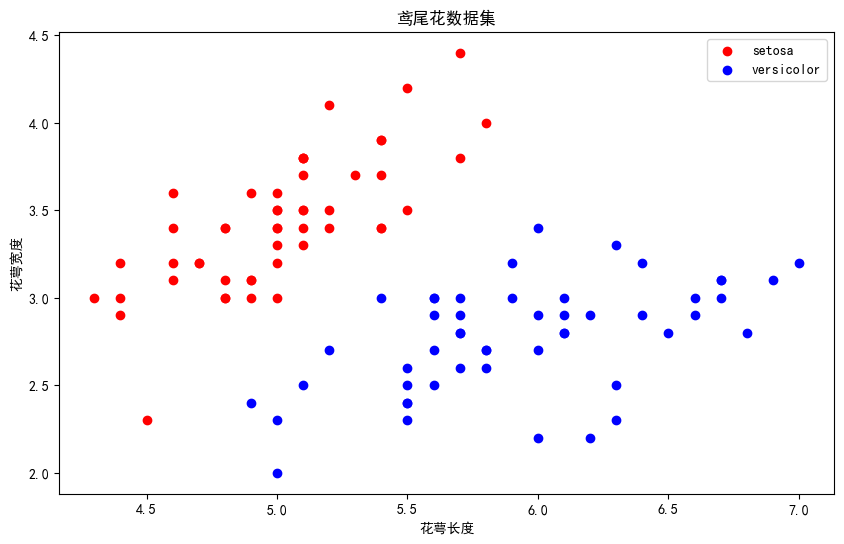

In [2]:
# 加载 iris 数据集
iris = load_iris()
# 查看数据集的描述
print("数据集描述：")
print(iris.DESCR)
# 查看特征名
print("\n特征名：")
print(iris.feature_names)
# 查看标签名
print("\n标签名：")
print(iris.target_names)
# 查看数据样本量
print("\n数据样本量：")
print("数据矩阵维度：", iris.data.shape)
print("标签向量维度：", iris.target.shape)

# 鸢尾花数据集的详细内容：
# 特征（输入）：花萼长度（sepal length）：以厘米为单位
# 特征（输入）：花萼宽度（sepal width）：以厘米为单位
# 特征（输入）：花瓣长度（petal length）：以厘米为单位
# 特征（输入）：花瓣宽度（petal width）：以厘米为单位
# 标签（输出）：类别（species）：包含三个类别，
# 分别是山鸢尾（setosa）、变色鸢尾（versicolor）和维吉尼亚鸢尾（virginica）

# 数据集中共有 150 个样本，每个样本有 4 个特征，分别是花萼长度、花萼宽度、花瓣长度、花瓣宽度，标签为鸢尾花的种类。
# 数据集中的数据矩阵的维度为 150×4，标签向量的维度为 150×1。
# 其中，标签向量中的 0、1、2 分别代表山鸢尾、变色鸢尾和维吉尼亚鸢尾。
# 山鸢尾、变色鸢尾和维吉尼亚鸢尾的样本量分别为 50、50 和 50
# 导入数据集并划分训练集、测试集

X = iris.data[:, :2]  # 使用前两个特征
y = iris.target
# 使用前两个类别的数据
X = X[y != 2]
y = y[y != 2]
class_names = iris.target_names[:2] # 这里选择前两类

# 绘制所选择的两个类别的散点图
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label=class_names[0], c='r')    # y==0 为第一类
plt.scatter(X[y == 1, 0], X[y == 1, 1], label=class_names[1], c='b')    # y==1 为第二类
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')
plt.title('鸢尾花数据集')
plt.legend()
plt.show()

# # 划分训练集和测试集，这里是按照 8:2 的比例划分
# # train_test_split的默认行为是随机抽样。如果你的数据已经是有序的，那么随机抽样可能会在训练集和测试集中创建类别的不均衡分布
# # 分别对两个种类的数据集进行划分，而不能直接对整个数据集进行划分
# X1_train, X1_test, y1_train, y1_test = train_test_split(X[:50,:2], y[:50], test_size=0.2, random_state=555)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X[50:100,:2], y[50:100], test_size=0.2, random_state=555)
# # 下面将两个数据集合并
# X_train = np.concatenate((X1_train,X2_train), axis=0)
# y_train = np.concatenate((y1_train,y2_train), axis=0)
# X_test = np.concatenate((X1_test,X2_test), axis=0)
# y_test = np.concatenate((y1_test,y2_test), axis=0)

# 简洁的话，采用stratify参数，可以直接按照原始数据集的类别比例来划分训练集和测试集
# train_test_split函数在没有指定stratify参数时，是进行随机划分的，也就是说从全部数据中随机抽取一定比例的数据作为测试集
# 然而，如果数据集的类别分布不均衡，如本例那样数据是按类别排序的，那么随机划分就会破坏数据的类别分布
# 在train_test_split中，可以通过设置stratify参数为目标标签y来实现分层抽样
# 在进行分层抽样时，函数会首先根据目标标签y的类别分布计算出每个类别应该在训练集和测试集中各占的比例，然后按这个比例从每个类别中随机抽取样本
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555, stratify=y)


##### （1）特征可视化，观察，所选取的数据集线性可分

2. 模型建立：使用选取的特征和两种类别建立二分类模型

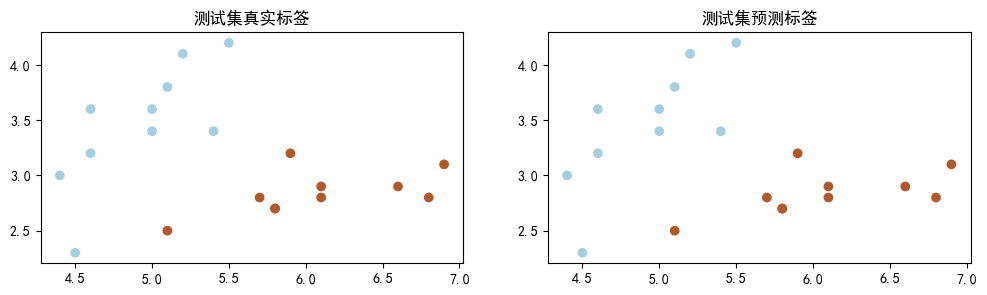

In [3]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
result = clf.predict(X_test)
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)# 绘制测试集散点图
plt.title('测试集真实标签')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=result, cmap=plt.cm.Paired)# 绘制测试集散点图
plt.title('测试集预测标签')
plt.show()


3. 输出：决策函数的参数、预测值、分类准确率等

In [4]:
test_predict = clf.predict(X_test)
train_predict = clf.predict(X_train)
coef = clf.coef_
intercept = clf.intercept_

# 计算训练集准确率，调用的是 sklearn 库中的 accuracy_score 函数
# 预测标签与真实标签进行比较，相同的数量除以总数即为准确率
print("训练集准确率：", sklearn.metrics.accuracy_score(y_train, train_predict)) 
print("测试集准确率：", sklearn.metrics.accuracy_score(y_test, test_predict))
print("权重：", coef)
print("截距：", intercept)
print("函数为: y = {:.2f}x1 + {:.2f}x2 + {:.2f},其中x1为花萼长度,x2为花萼宽度".format(coef[0][0], coef[0][1], intercept[0])) 
# 所求解的线性方程没有随机性，因为随机数种子random_state=0，所以每次运行的结果都是一样的

训练集准确率： 1.0
测试集准确率： 1.0
权重： [[ 2.78098037 -2.92450404]]
截距： [-6.0048099]
函数为: y = 2.78x1 + -2.92x2 + -6.00,其中x1为花萼长度,x2为花萼宽度


4. 决策边界可视化：将二分类问题的边界可视化

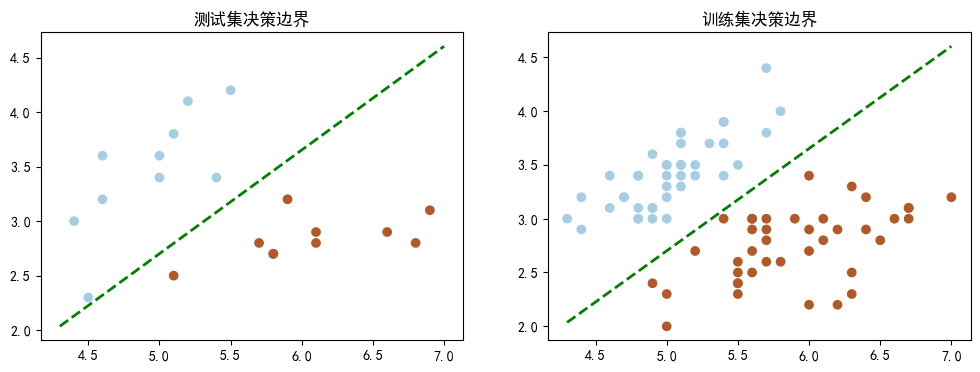

In [5]:
X_max, X_min = X[:, 0].max(), X[:, 0].min()
xx = np.array([X_min, X_max])               # xx 为生成的直线上的点
yy = -coef[0][0] / coef[0][1] * xx - intercept[0] / coef[0][1]      # 根据直线方程计算 yy
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(xx, yy, c='g',linewidth=2,linestyle='--')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)   # 绘制测试集散点图, c=y_test 为真实标签
plt.title('测试集决策边界')
plt.subplot(122)
plt.title('训练集决策边界')
plt.plot(xx, yy, c='g',linewidth=2,linestyle='--')  # xx 为生成的直线上的点, yy 为直线上点的纵坐标
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)   # 绘制训练集散点图, c=y_train 为真实标签
plt.show()